In [1]:
import visualID as vID
from visualID import color
vID.init()

**Début à:** Tuesday 24 May 2022, 22:28:32  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoBegin.svg" style="margin-left:auto; margin-right:auto"></img></p>

# Traitement statistique de données
contact: romuald.poteau@univ-tlse3.fr

## Introduction  

### Prérequis
- matplotlib & seaborn
- listes
- boucles (for)

### Objectifs
- xx
- xx
- xx

### Compétences
à l'issue de cette série de TP, vous saurez :  

**1ère partie (Lecture et analyse de la base de données par la librairie pandas)**  
- xx
- xx
- xx

**2ème partie (régression linéaire)**  
- xx
- xx
- xx

**3ème partie (Machine learning appliqué à la classification = régression logistique)**  
- xx
- xx
- xx

### Contexte du TP
Ce sujet exploite une base de données très utilisées pour l'apprentissage de méthodes statistiques, la base **IRIS** : 
- elle regroupe les caractéristiques de trois espèces de fleurs d’Iris : Setosa, Versicolor et Virginica
- la base regroupe 50 observations par espèce (soit 150 **individus**)
- chaque observation repose sur 4 caractéristiques (c'est-à-dire 4 **variables**): longueur et largeur de sépales ainsi que longueur et largeur de pétales

<p style="text-align: center"><img width="500px" src="./iris-images/iris.png" style="margin-left:auto; margin-right:auto" id="img_iris"></img></p>

Une page [wikipedia](https://fr.wikipedia.org/wiki/Iris_de_Fisher) porte sur ce dataset.

## 1. Lecture et analyse de la base de données par la librairie pandas

- **pandas** est une librairie python qui permet de **manipuler facilement des données** et des les **analyser**
- elle permet en particulier de manipuler des tableaux de données avec des étiquettes de variables (colonnes) et d'individus (lignes)
- ces **tableaux** sont appelés *DataFrames** (df)
- on peut facilement lire et écrire ces dataframes à partir ou vers un fichier tabulé (format **excel**, csv, etc)
- on peut faciler **tracer des graphes** à partir de ces DataFrames grâce à **matplotlib**, ou bien à l'aide d'autres librairies dédiées à l'analyse statistique de données.

<div class="warn">
Comme pour toute librairie python qui apporte des commandes et fonctionalités avancées avec leur syntaxe et logique propre, on n'hésitera pas à utiliser une <b>"Cheat Sheet"</b>, et à faire des copier/coller des principales commandes (inutile de s'encombrer le cerveau avec une syntaxe complexe). Il en existe plusieurs pour pandas, dont  une <a href="https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf">Cheat Sheet officielle, télécheargeable</a>.
</div>

In [2]:
# ne perdons pas l'habitude de charger la librairie pylab,
#très utile pour de la programmation scientifique avec python
from pylab import *
# importation de la libairie pandas
import pandas as pd

### 1.1. Lecture des données

In [6]:
# on utilise la fonction read_csv de la librariries pandas (aka pd)
pd.read_csv('./iris-data/iris.csv', sep=";")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


On va maintenant stocker ces données dans un *dataframe pandas*, qu'on va appeler dfi (comme DataFrame Iris). C'est un type de données tabulées, c'est-à-dire composé de 2 dimensions.

Chaque **ligne** représente un *échantillon*. Dans le domaine de l'apprentissage automatique ou des statistiques descriptives, les termes équivalents couramment utilisés sont *enregistrement*, *instance* ou *observation*.

Chaque **colonne** représente un type d'information qui a été collecté et est appelée *caractéristique*. Dans le domaine de l'apprentissage automatique et des statistiques descriptives, les termes équivalents couramment utilisés sont *variable*, *attribut* ou *descripteur*.

In [139]:
# même chose que précdemment, mais on sauve dans une variable dfi (comme dataframe iris)
dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
# cette fois-ci rien n'est affiché. On va pour dela utiliser la fonction display
# qui est une fonction standard (fournie par IPython.display)
display(dfi)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<div class=warn>
    <b>attention</b>: les <i>colonnes</i> sont indexées par leur nom et les <i>lignes</i> (qu'on appelle une <b>série</b> de données) par les index entiers 0 à 149. Chacun des 150 échantillons est donc indexé par un nombre entier
</div>

### 1.2. Manipulations simples des données
#### 1.2.a. Mise en évidence de la structuration des données en tableaux
La commande `NomDuDataFrame.to_numpy()` renvoie la structure matricielle d'un data frame sous forme de liste, tel que numpy code les tableaux (ou **matrices**) de données

In [140]:
dfi.to_numpy()

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

#### 1.2.b. Accès à des variables
On peut adresser chaque colonne par son index d'en-tête, c'est-à-dire son nom.
<div class=warn>
Attention à écrire le nom sans erreur et en <b>respectant la casse</b>.
</div>

In [141]:
dfi["sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

La commande suivante permet d'afficher les 3 premières lignes du tableau (<span style="color:red">on rappelle que les lignes sont indexées par des nombres</span>)

In [142]:
dfi[0:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


<div class="warn">
    <b>Attention</b>, c'est piégeux ! On a un tableau (une <b>matrice</b>) dont la première ligne débute avec l'en-tête. Ces nombres entre crochets font référence aux coordonnées des lignes de ce tableau, tel qu'on l'a mis en évidence avec la commande <code>dfi.to_numpy()</code>
</div>

On va maintenant accéder aux 3 premières valeurs de la colonne petal_length

In [143]:
dfi["petal_length"][0:3]

0    1.4
1    1.4
2    1.3
Name: petal_length, dtype: float64

**Plus fort.** On peut fabriquer un nouveau dataframe sur la base d'une condition

In [144]:
dfi[ dfi["sepal_width"] > 3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica


#### 1.2.c. Opérations
On peut **trier les données par ordre croissant ou décroissant**

In [145]:
dfi.sort_values(by="petal_length")

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
...,...,...,...,...,...
131,7.9,3.8,6.4,2.0,virginica
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
122,7.7,2.8,6.7,2.0,virginica


<div class="warn">
Notez que les index de lignes sont triés eux-aussi.<br>
Ça peut sembler secondaire, mais c'est important car ça sert d'<b>identifiant de l'échantillon</b> 
</div>

On peut aussi appliquer une **opération arithmétique** aux variables sélectionnées

In [146]:
dfi*3

,sepal_length,sepal_width,petal_length,petal_width,species
0,15.3,10.5,4.2,0.6,setosasetosasetosa
1,14.7,9.0,4.2,0.6,setosasetosasetosa
2,14.1,9.6,3.9,0.6,setosasetosasetosa
3,13.8,9.3,4.5,0.6,setosasetosasetosa
4,15.0,10.8,4.2,0.6,setosasetosasetosa
...,...,...,...,...,...
145,20.1,9.0,15.6,6.9,virginicavirginicavirginica
146,18.9,7.5,15.0,5.7,virginicavirginicavirginica
147,19.5,9.0,15.6,6.0,virginicavirginicavirginica
148,18.6,10.2,16.2,6.9,virginicavirginicavirginica


<div class="warn">
    Regardez la colonne <b>species</b>...<br>
    On ne veut appliquer cette opération qu'aux colonnes 0 à 4 <br>
    On va pour ça :
    <li> copier dfi dans un nouveau dataframe (à l'aide de la méthode <code>.copy()</code>)
    <li> faire une boucle en utilisant l'attribut <code>columns</code>
    <li> copier 
</div>

In [147]:
#on regarde d'abord ce que fait l'attribut columns()
dfi.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [148]:
# copie de dfi en tant que nouveau dataframe dfi3
# si on avait fait df3=dfi, les deux pointeraient vers le même tableau!
# toute opération sur l'un se répercuterait sur l'autre
dfi3=dfi.copy()

# maintenant on boucle
for col in dfi3.columns[0:4]:
    dfi3[col]=dfi[col]*3
    
display(dfi3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,15.3,10.5,4.2,0.6,setosa
1,14.7,9.0,4.2,0.6,setosa
2,14.1,9.6,3.9,0.6,setosa
3,13.8,9.3,4.5,0.6,setosa
4,15.0,10.8,4.2,0.6,setosa
...,...,...,...,...,...
145,20.1,9.0,15.6,6.9,virginica
146,18.9,7.5,15.0,5.7,virginica
147,19.5,9.0,15.6,6.0,virginica
148,18.6,10.2,16.2,6.9,virginica


### 1.3. Analyse graphique des données
#### 1.3.a. Fonction `describe` (librairie pandas)
On va en premier lieu faire une analyse statistique de chacune des colonnes.

Dans la syntaxe ci-dessous, on exploite la possibilité d'appliquer une fonction à une variable (c'est ce qu'on appelle la programmation orienté objet). C'est toujours sur le modèle `nomVariable.fonction()`. La commande `dfi.describe(options)` consiste à appliquer la fonctionnalité de calcule des données statistiques descriptives de chaque colonne qui contient des données numériques - telles que le nombre de données, la moyenne, l’écart type, la valeur minimale et maximale, ainsi que les [quartiles](https://fr.wikipedia.org/wiki/Quartile).

In [242]:
dfi.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<div class="rq">
Les sépales sont en moyenne plus longs et plus larges que les pétales, ce qui est cohérent avec la <a href="#img_iris">figure de l'introduction</a>.
</div>

#### 1.3.b. Fonction `hist` (librairie pandas)
On va maintenant utiliser la fonction [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) de `pandas`.  
Elle permet de rapidement voir pour chaque propriété :
- sur quelle gamme de valeurs elle s'étend
- et quelle est la distribution des valeurs


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

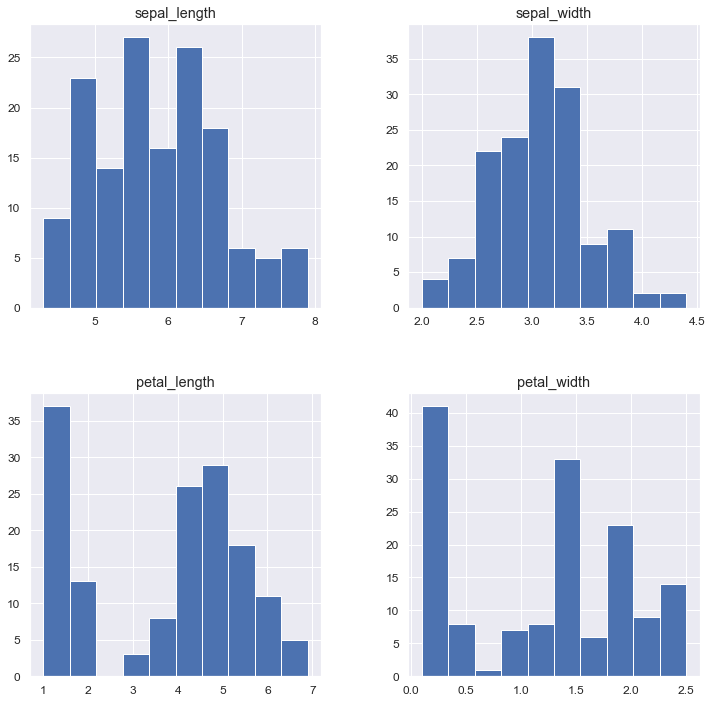

In [243]:
dfi.hist(figsize=(12,12),xlabelsize=12,ylabelsize=12)

#### 1.3.c. Fonction `jointplot` (librairie seaborn)
**Seaborn** est une bibliothèque permettant de créer des graphiques statistiques en Python. Elle est basée sur matplotlib, et s’intègre très bien avec pandas.
La fonction `jointplot` permet de tracer la distribution jointe de deux caractéristiques. On va par exemple regarder s'il y a une corrélation entre la longueur d'un pétale et sa largeur, ainsi qu'entre la largeur et la longueur d'un sépale. 

<div class="warn">
Encore une fois, on n'hésitera pas à utiliser une <b>"Cheat Sheet"</b> pour faire des copier/coller des principales commandes. Il en existe plusieurs pour seaborn, dont  la <a href="http://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247">Cheat Sheet  de DataCamp, télécheargeable</a>.
</div>

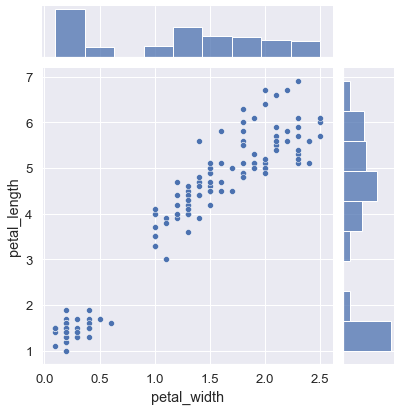

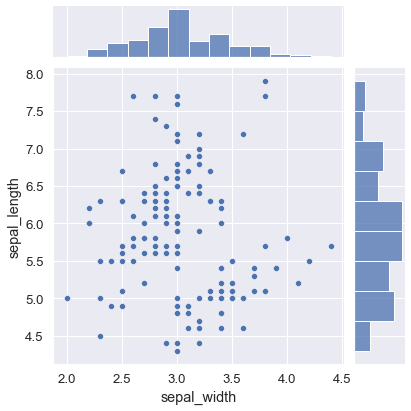

In [244]:
import seaborn as sb
sb.jointplot(x = "petal_width", y = "petal_length", data = dfi)
sb.jointplot(x = "sepal_width", y = "sepal_length", data = dfi)

<div class="rq">On va faire la même chose que précédemment, mais avec l'option <code>hue</code> (<i>teinte</i>) afin d'attribuer une couleur aux points en fonction de l'espèce d'Iris (variable 'species')</div>

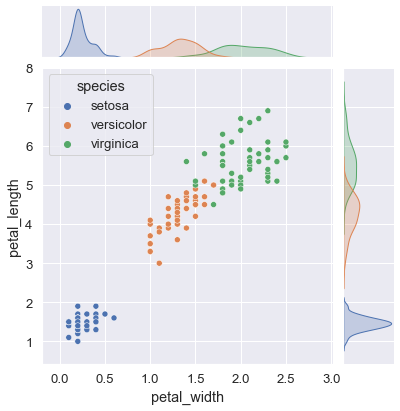

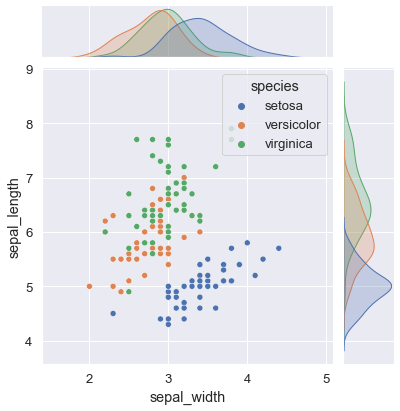

In [245]:
import seaborn as sb
sb.jointplot(x = "petal_width", y = "petal_length", data = dfi, hue="species")
sb.jointplot(x = "sepal_width", y = "sepal_length", data = dfi, hue="species")

<div class="rq">
<li> le <b>résultat marquant</b> est que non seulement il y a corrélation entre longueur et largeur des pétales, mais il y a aussi une claire <b>séparation des espèces</b> qui semblent <span style="color:red"><b>classifiables</b></span> en fonction de la longueur et largeur de leurs pétales (<i>setosa</i> : pétales courts, <i>versicolor</i> : pétales moyens, <i>virginica</i> : pétales longs)<br>
<li> en revanche, les epèces d'Iris <i>versicolor</i> et <i>virginica</i> ont des sépales de longueur et largeur similaires ("mélange" des points verts et orange). Ces 2 propriétés ne sont pas des bons descripteurs permettant de classifier ces variétés d'iris
</div>
<br>
<div class="warn">
    Cette notion de <b>classification</b> est importante dans la perspective d'utiliser des algorithmes d'intelligence artificielle de type <b>apprentissage automatique (machine learning)</b>.
</div>

#### 1.3.c. Fonction `pairplot` (librairie seaborn)
La fonction `pairplot` permet de simultanément visualiser les corrélations potentielles entre toutes les variables. On retrouve sur la diagonale les histogrammes de distribution de chacune des variables.
<div class=warn>
<b>Patience !</b> Ce tracé prend un peu de temps
<br>Tant qu'on voit <code>In [*]</code> à gauche de la cellule qu'on est en train d'exécuter, c'est-à-dire avec une * au lieu d'un numéro de sortie, c'est que python est occupé à interpréter la série de commandes de la cellule
</div>

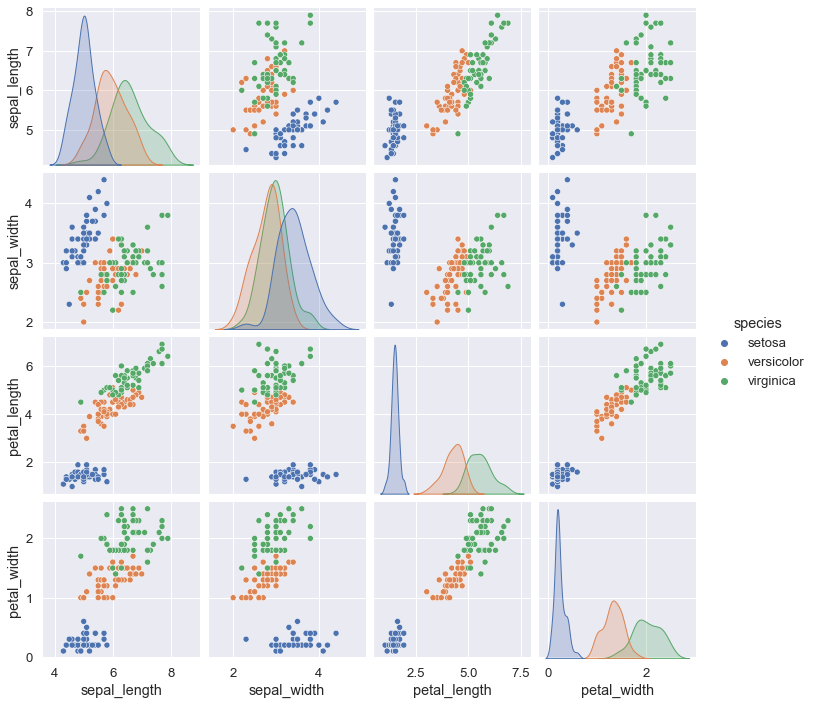

In [249]:
sb.pairplot(dfi,hue='species')

#### 1.2.d. Fonctions `corr` (librairie pandas) `heatmap` (librairie seaborn)
On vient de voir que certaines variables semblent corrélées entre elles, en particulier la longueur et la largeur des pétales. Les **cartes thermiques** (**heatmaps**) font partie de la panoplie du data scientist. Elles permettent de rapidement identifier si des variables sont corrélées entre elles. Il faut pour cela avoir au préalable calculé la matrice de corrélation à l'aide de la fonction  [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

<div class="rq">
<b> fonction corr() </b>
  <li> La valeur de la corrélation va de -1 à +1
  <li> corrélation nulle : deux variables sont indépendantes l’une de l’autre
  <li> corrélation positive : les variables évoluent dans le même sens
  <li> corrélation négative : les variables évoluent en sens contraire
</div>

In [247]:
dfi.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


On va maintenant visualiser cette carte sous forme graphique, en y reportant ces nombres

<AxesSubplot:>

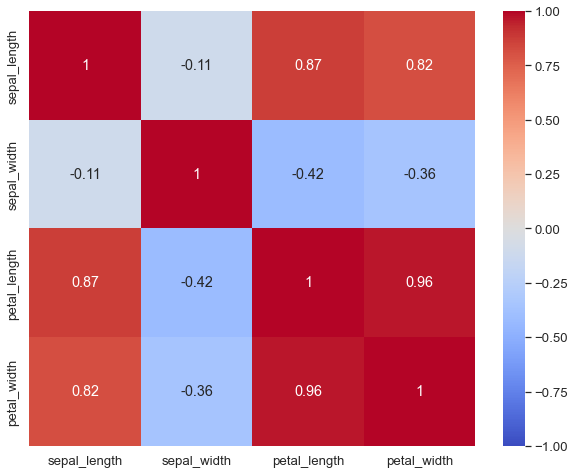

In [248]:
plt.figure(figsize = (10,8))
sb.set(font_scale=1.2)
sb.heatmap(dfi.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')

<div class="rq">
    <li> il n'y a que des 1 sur la diagonale > <b> normal !</b><i> une variable est forcément corrélée avec elle-même</i>
<li> il n'y a <i>pas de corrélation significative</i> entre longueur et largeur des sépales (cases bleu clair) 
<li> il y a <i>proportionalité</i> entre longueur de sépales et longueur et largeur des pétales (cases rouge vif)
<li> la largeur des sépales est plutôt <i>inversement proportionnelle</i> à la largeur et à la longueur des pétales (cases bleues)
</div>

### Bilan de la première partie

### Suggestion de petites applications en autonomie

#### Recherche de corrélation entre données 

**La première partie a pour but de créer des données au format pandas. Certaines sont corrélées entre elles. On va vérifier que la carte thermique est cohérente avec les corrélations**


Création des données. Vous n'avez aucune intervention à faire dans cette cellule, à part l'exécuter. On va générer :
- un jeu de 100 valeurs aléatoires X1, comprises entre [-10, 10]
- un deuxième jeu de 100 valeurs aléatoires X2, dans le même intervalle
- des valeurs bruitées, autour d'une fonction $f_1(x)=2x$
- des valeurs bruitées, autour d'une fonction $f_2(x)=-3x$  


Pour $f_1$ et $f_2$, les valeurs de $x$ seront celles du tableau X1

In [156]:
import numpy as np 
import seaborn as sb
from pylab import *
import random

def noiseF(f, X):
    noise = 2
    N = noise * np.random.normal(0,1,(nbp,1))
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f1(x):
    return 2*x
def f2(x):
    return -3*x

nbp = 100
xmin = -10
xmax = 10. 
# vecteurs X1 & X2
# random.uniform(low=0.0, high=1.0, size=None)
X1 = np.random.uniform(xmin,xmax,(nbp,1))
X2 = np.random.uniform(xmin,xmax,(nbp,1))

data1 = noiseF(f1,X1)
data2 = noiseF(f2,X1)

On va tracer les 2 fonctions pour voir à quoi elles ressemblent.  Vérifiez de visu que les distributions de points sont cohérentes avec les expressions des fonctions

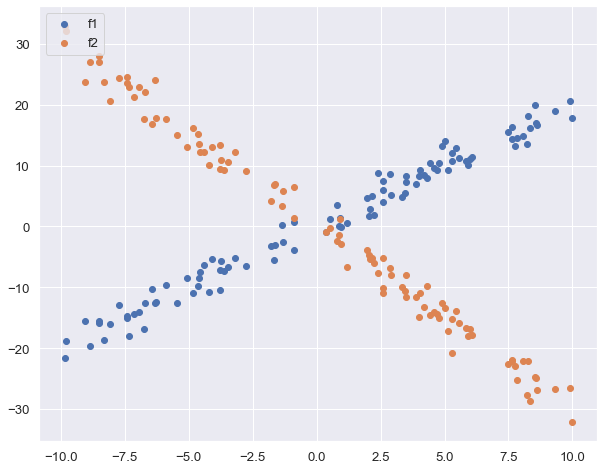

In [157]:
figure(figsize = (10,8))
scatter(data1[:,0],data1[:,1],label='f1')
scatter(data2[:,0],data2[:,1],label='f2')
legend(loc="upper left")

On va maintenant stocker ces données au format pandas dans un tableau nommé `df`. Les deux premières colonnes du tableau `df` vont contenir les valeurs de X1 et X2, et les suivantes les valeurs que prennent les fonctions f1 et f2 pour chacune des valeurs de X1

In [158]:
import pandas as pd
df = pd.DataFrame(X1, columns = ['X1'])
df['Xb'] = pd.DataFrame(X2)
df['f1'] = pd.DataFrame(data1[:,1])
df['f2'] = pd.DataFrame(data2[:,1])

<div class="warn"><b>Maintenant, à vous de jouer</b></div> 
(1) afficher le tableau `df`, qui contient les données

In [159]:
display(df)

,X1,Xb,f1,f2
0,-8.292877,5.919942,-18.556165,23.803841
1,4.584524,1.950980,9.640391,-13.978104
2,-6.313169,-2.419819,-12.500765,24.026261
3,4.014240,0.245684,8.317352,-14.778472
4,-0.878698,-1.769262,0.815352,1.383285
...,...,...,...,...
95,-7.126524,-6.718434,-14.326055,21.236281
96,5.994704,1.015840,11.080126,-16.859147
97,-1.772614,2.427327,-3.156706,4.224153
98,-3.631141,-2.066302,-7.251139,9.269516


(2) Afficher un aperçu de la distribution statistique des données (*suggestion*: utiliser la fonction `describe` de pandas)

In [160]:
df.describe()

,X1,Xb,f1,f2
count,100.000000,100.000000,100.000000,100.000000
mean,0.424512,-0.353988,0.925239,-0.993857
std,5.655468,5.743451,11.395321,17.160030
min,-9.851397,-9.831931,-21.639782,-32.024123
25%,-4.556263,-5.271671,-8.799813,-14.588858
50%,1.562583,-0.995537,1.771766,-4.260206
75%,4.918426,4.711171,10.430431,13.145867
max,9.976191,9.647262,20.669540,32.889502


(3) Tracer toutes ces données les unes en fonctions des autres (*suggestion*: utiliser la fonction `pairplot` de pandas)

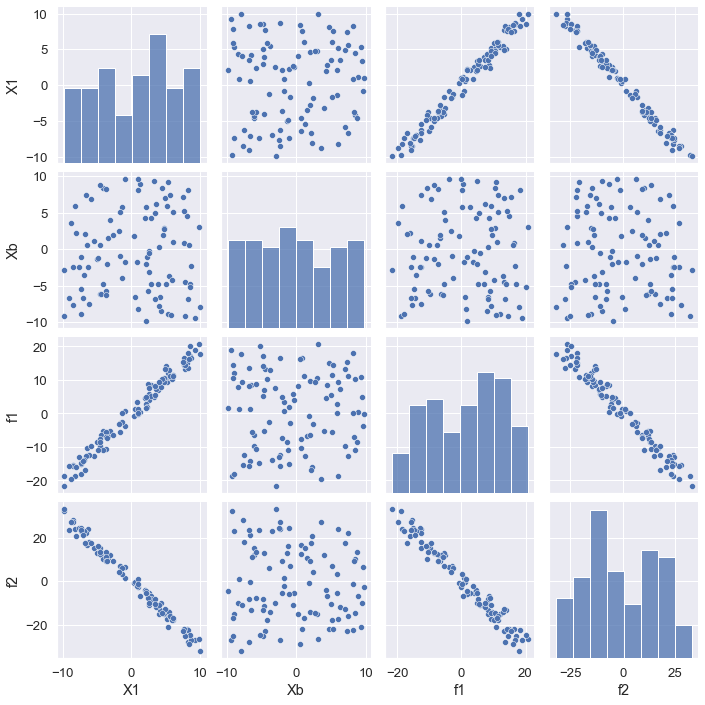

In [161]:
sb.pairplot(df)

(4) Tracer une carte thermique (*suggestion*: utiliser la fonction `heatmap` de pandas)

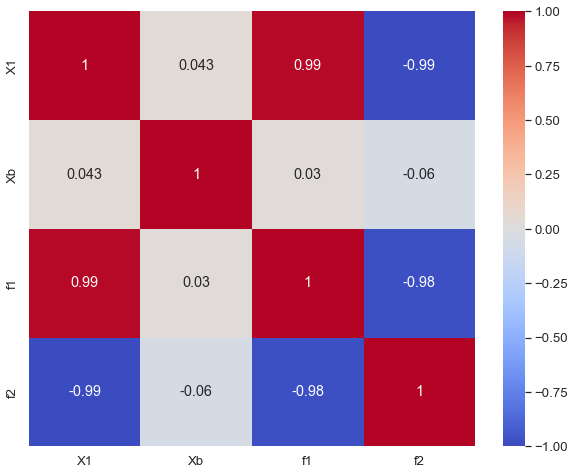

In [162]:
plt.figure(figsize = (10,8))
sb.set(font_scale=1.2)
fig = sb.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')
savefig("svg/heatmap1.png")

<div class="warn">
Si tout va bien, vous venez d'obtenir la carte thermique suivante (<i>les valeurs peuvent légèrement changer compte tenu du bruit statistique,</i> cf variable <code>noise</code></i>):
<p style="text-align: center"><img src="./svg/heatmap1.png" style="margin-left:auto; margin-right:auto" id="img_heatmap1"></img></p>   
    
<b>Commentaires</b><br>
    <li> les deux séries de variables X1 et X2 ont été générées aléatoirement. Les deux séries sont indépendantes l'une de l'autre, ou bien cela signifierait qu'il y a un problème avec le générateur utilisé
    <li> f1 et f2 sont des fonctions des nombres contenus dans X1. Il ne peut donc pas y avoir de corrélation statistique avec X2.
    <li> f1 étant une fonction croissante de X1 (au bruit statistique près), il y a corrélation positive entre les deux. On ne peut pas onbtenir 1 à cause de la petite fluctuation positive introduite (reprenez le sujet et créez un bruit élevé en augmentant la valeur de <code>noise</code>). 
    <li> il y a une forte corrélation négative entre f2 et X1, puisque f2 est une fonction qui décroit en fonction de X1
    <li> la forte corrélation négative entre f1 et f2 est également attendue
</div>

### Évaluation formative après la vidéo

In [163]:
# Démarrage du thème 2
import visualID as vID
from visualID import color
vID.init()

**Début à:** Tuesday 24 May 2022, 17:46:53  
**Hostname:** insa-11357 (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoBegin.svg" style="margin-left:auto; margin-right:auto"></img></p>

## 2. Statistiques et régression

### 2.1. Régression linéaire
En statistiques, en économétrie et en apprentissage automatique (machine learning), un modèle de régression linéaire est un modèle qui cherche à établir une relation linéaire entre une variable *y* et une  variable *x* qui sont toutes deux tirées d'observations. L'incertitude sur ces observations entraîne que le tracé de la variable *y* en fonction de *x* s'apparente le plus souvent à un nuage de points, comme sur la figure ci-dessous.

<p style="text-align: center"><img width="600px" src="./svg/fct1.png" style="margin-left:auto; margin-right:auto" id="img_fct1"></img></p>

Dans le cadre d'un modèle linéaire simple, l'optimisation de ce modèle permet de déterminer :
- la droite de régression, qui est la droite qui **passe au plus près de l'ensemble des points** (représentée en rouge sur la figure ci-dessus)
- les paramètres *a* et *b* de la droite d'équation $\hat{y}=ax+b$. *a* est le coefficient directeur (la pente) et *b* est l'ordonnée à l'origine
- l'incertitude sur chacun de ces paramètres
- le coefficient de détermination *R<sup>2</sup>*, qui est une mesure de la qualité de la régression linéaire

<div class=warn>
<b>Pourquoi un chapeau sur $\hat{y}$? </b> <br>
Car l'expression $\hat{y}=ax+b$ va permettre de faire une <b>prédiction</b> de la variable $y$ pour n'importe quelle valeur de $x$, pas seulement pour celles qui sont représentées sous forme de nuage de points
</div>

#### 2.1.a. Chargement des librairies utiles
On va importer dans notre environnement de travail :
- `pylab`, très utile pour de la programmation scientifique avec python
- `pandas`, qui permet de lire des tableaux au format excel ou csv
- `numpy`, destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux
- `linregress`, qui fait partie de la librairie statistique `scipy`

In [7]:
from pylab import *
import pandas as pd
import numpy as np
from scipy.stats import linregress

<div class=warn>
<b>Attention !</b> <br>
La libraririe SciPy utilise les tableaux et matrices au format NumPy. <br>
Il faudra donc convertir tout tableau au format pandas en tableau au format NumPy
</div>

#### 2.1.b. Visualisation des données

Dans les lignes de code ci-dessous :
- on charge la base de données iris, qui va être stockée au format pandas dans la variable `dfi`
- on trace la longueur des pétales (`petal_length`) en fonction de leur largeur (`petal_width`)

<div class="rq">
    on a choisi d'assigner la longueur des pétales à $y$ et la largeur à $x$ 
</div>

<AxesSubplot:xlabel='petal_width'>

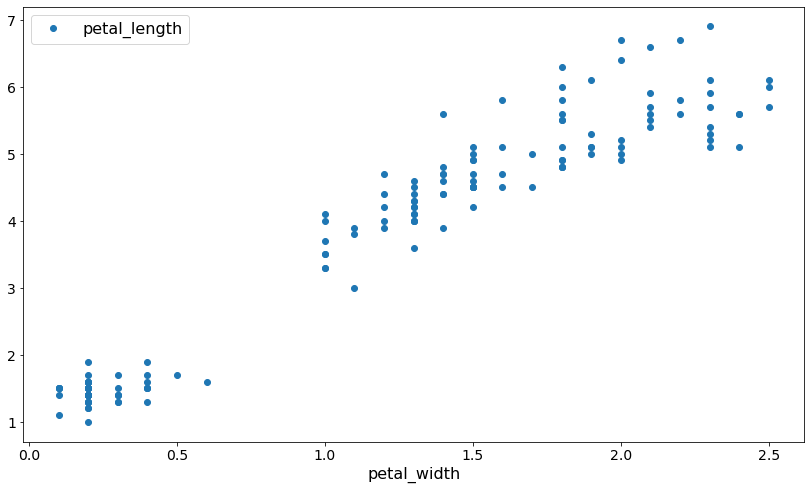

In [8]:
dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
plt.rcParams["figure.figsize"] = (14,8) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (16) #on ajuste la taille des caractères
dfi.plot(x="petal_width", y="petal_length",linestyle='', marker='o',fontsize=14)

<div class="rq">
    Il semble bien, <i>de visu</i>, qu'il y ait une relation linéaire entre longueur et largeur des pétales
</div>

#### 2.1.c. Utilisation de la fonction `linregress` (librairie SciPy)
<div class=warn>
Comme prévu, on commence à convertir les variables au format pandas en variables au format NumPy. <br>
On utilise pour cela la fonction <code>to_numpy()</code>
</div>
<li> la largeur de pétales des 150 échantillons est stockée dans une variable pw (comme petal width)
<li> leur longueur est stockée dans une variable pl (pour petal length)

In [9]:
pw=dfi["petal_width"].to_numpy()
pl=dfi["petal_length"].to_numpy()
print("petal width au format numpy")
display(pw)
print("petal length au format numpy")
display(pl)

petal width au format numpy


array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

petal length au format numpy


array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

<div class="rq">
Ça ressemble bien à un tableau au format NumPy</div>

On peut maintenant appeler la fonction `linregress`.<br>
Elle va renvoyer la pente (`slope`), l'ordonnée à l'origine (`intercept`), l'erreur sur la pente (`stderr`), l'erreur sur l'ordonnée à l'origine (`intercept_stderr`), le coefficient de corrélation (`rvalue`). <br>
<div class=warn>
<b>Remarque</b>. Dans le cas de la régression linéaire, le coefficient de détermination $R^2$ ("R-carré") est le carré du coefficient de corrélation.
</div>

- on appelle simultanément `linregress` et on sauve le résultat dans une variable `fit`
- puis on va récupérer les paramètres de la droite et du fit
- enfin on affiche les paramètres (ne vous laissez pas impressionner par l'affichage formatté, pour un rendu plus propre)

In [10]:
fit = linregress(x=pw, y=pl)

a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR^2 = {r**2:6.3f}")
print(f"Erreur standard sur la valeur de la pente ={stderr:8.3f}\nErreur standard sur la valeur de l'ordonnée à l'origine ={istderr:8.3f}")

a   =    2.226
b   =    1.091
R^2 =  0.927
Erreur standard sur la valeur de la pente =   0.051
Erreur standard sur la valeur de l'ordonnée à l'origine =   0.073


On n'est pas obligé de formatter la sortie. Voici des instructions `print()` basiques

In [11]:
print("a=",a)
print("b=",b)
print("R2=",r**2)
print("erreur pente=",stderr)
print("erreur OO=",istderr)

a= 2.2258853065539115
b= 1.0905721458773772
R2= 0.9269012279220042
erreur pente= 0.05138190916478042
erreur OO= 0.07294301009148557


<div class=warn>
C'est peu lisible, et on n'a pas besoin d'autant de chiffres significatifs d'où, <i>in fine</i>, l'intérêt de formatter la sortie</div>

#### 2.1.d. Représentation graphique des résultats
On va utiliser la fonction `plot()`. 

On veut à la fois :
- tracer les points $y$ en fonction de $x$
- vérifier que la régression linéaire semble juste, c'est-à-dire que la droite d'équation $\hat{y}=ax+b$ passe bien au plus près de l'ensemble des points 

Dans les lignes de code python ci-dessous :
- on définit la fonction `y_hat` (y chapeau...) qui va renvoyer $ax+b$ pour toute valeur de $x$ ($a$, $b$, $x$ sont passés en paramètre de `y_hat`)
- on appelle `plot` deux fois
    - pour tracer le nuage de points ($x$,$y$)
    - pour tracer la droite `y_hat`

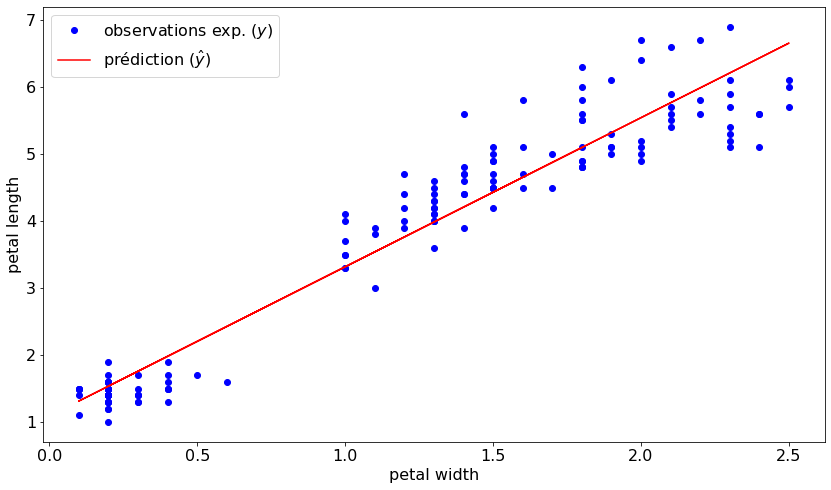

In [12]:
def y_hat(a,b,x):
    return a * x + b
# on calcule pl_hat la longueur prédite, pour chacune des largeurs (pw) mesurées expérimentalement
pl_hat = y_hat(a,b,pw)

plot(pw, pl,linestyle='', marker='o', color='blue', label='observations exp. ($y$)')
plot(pw,pl_hat,color='red',label='prédiction ($\hat{y}$)')
xlabel("petal width") # label de l'axe des abscisses
ylabel("petal length") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

<div class="rq">
    <b>En résumé :</b>
<li> le coefficient de détermination $R^2$ est proche de 1
<li> les erreurs sur l'OO et sur la pente sont faibles
<li> les points expérimentaux ont l'air bien répartis de part et d'autre de la droite
<br><b> Il est donc plutôt convaincant que la largeur et la longueur des pétales soient reliées par une relation linéaire</b>
</div>

#### 2.1.e. Évaluation de la régression : erreurs moyennes et résidus


MAE =  Mean Absolute Error 
$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|\hat{Y}(x_{i})-Y(x_{i})\right|$$

MSE = Mean Squared Error  
$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left(\hat{Y}(x_{i})-Y(x_{i})\right)^{2}$$

In [13]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print(f"MSE = {MSE(pl,pl_hat):8.3f}\nMAE ={MAE(pl,pl_hat):8.3f}")

MSE =    0.226
MAE =   0.368


Les **résidus** sont définis comme étant les différences entre les valeurs observées et les valeurs prédites par un modèle de régression :

$$e(x_i)=y(x_i)-\hat{y}(x_i)$$

Ils sont calculés pour chacun des points $x_i$ qui a servi à déterminer le modèle de régression. L’analyse des résidus a pour objectif de tester la validité d’un modèle de régression. Il s’agit de vérifier graphiquement qu'ils ne présentent aucune structure particulière, c'est-à-dire qu'ils sont distribués irrégulièrement autour de 0. 

Dans la portion de code ci-dessous :
- on va d'abord définir une fonctions `residus` ($y(x_i)-\hat{y}(x_i)$)
- puis on va reporter sur un graphe de type nuage de points les résidus calculés pour chaque largeur de pétale (i.e. les $x_i$)
- on va enfin tracer un histogramme, c'est-à-dire la distribution des résidus auour de 0 (0 étant une prédiction parfaite de la fonction $\hat{y}$)
- on va pouvoir ainsi analyser graphiquement la validité de la corrélation linéaire entre largeur et longueur des pétales d'iris

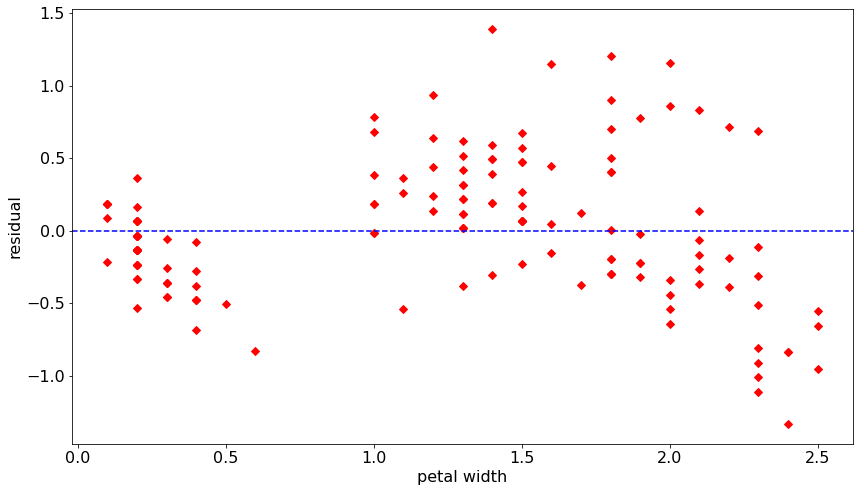

(array([ 1.,  0.,  3.,  0.,  0.,  3.,  3.,  5.,  3.,  5.,  7.,  6.,  5.,
        13., 14., 14., 11., 13.,  9., 11.,  8.,  4.,  3.,  0.,  4.,  2.,
         1.,  1.,  0.,  1.]),
 array([-1.39318842, -1.30232558, -1.21146274, -1.12059989, -1.02973705,
        -0.93887421, -0.84801136, -0.75714852, -0.66628568, -0.57542283,
        -0.48455999, -0.39369715, -0.3028343 , -0.21197146, -0.12110862,
        -0.03024577,  0.06061707,  0.15147992,  0.24234276,  0.3332056 ,
         0.42406845,  0.51493129,  0.60579413,  0.69665698,  0.78751982,
         0.87838266,  0.96924551,  1.06010835,  1.15097119,  1.24183404,
         1.33269688]),
 <BarContainer object of 30 artists>)

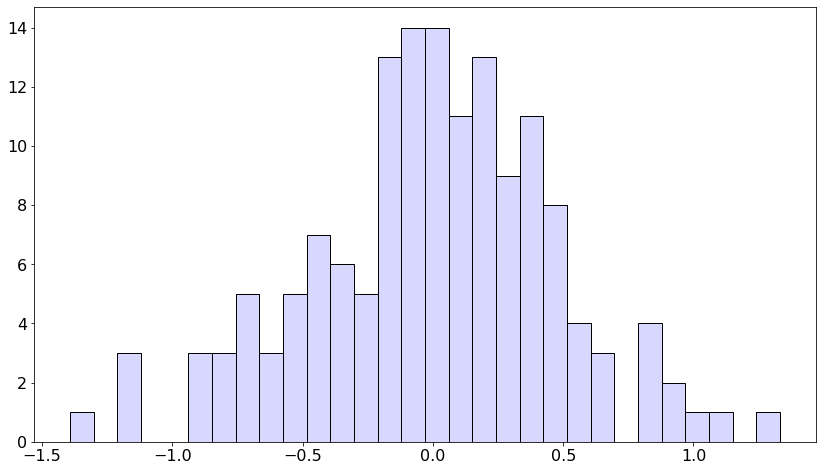

In [14]:
def residus(y,y_hat):
    return y-y_hat

plot(pw,residus(pl,pl_hat), linestyle='', marker="D", color='red')
axhline(y = 0, color = 'b',linestyle='--')
xlabel("petal width")
ylabel("residual")
show()

hist(residus(pl_hat,pl), 30, cumulative=False,label='Training set',color='#d8d8ff', edgecolor='black',align='mid')

<div class="rq">
<li>Le premier graphique semble montrer une distribution aléatoire de la différence entre prédiction et valeur observée
<li>L'histogramme montre une distribution "en cloche" (gaussienne) des résidus, ce qui confirme qu'il semble y avoir une relation linéaire entre largeur et longueur de pétale
</div>

<div class="warn">
<b> La partie ci-dessous est optionnelle.</b>
L'objectif de cette partie est de tracer le nuage de points et l'histogramme à l'aide de la librairie <code>seaborn</code>, qui permet :
<li> de tracer une représentation graphique de meilleure qualité
<li> de tracer l'histogramme des résidus par catégorie d'iris
<li> de tracer les histogrammes en parallèle du nuage de points, c'est-à-dire avec la même échelle des ordonnées
</div>

(-2.0, 2.0)

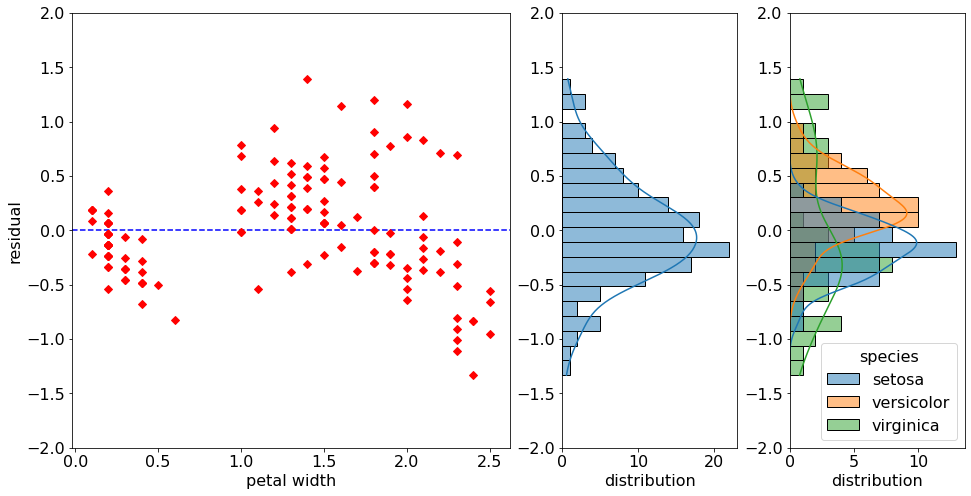

In [15]:
import seaborn as sb
from matplotlib import gridspec
def residus(y_hat,y):
    return y-y_hat
species=dfi["species"]
nbins=20
limit=2
plt.rcParams["figure.figsize"] = (16,8) #on ajuste la taille du graphique
gs = gridspec.GridSpec(1, 3, width_ratios=[2.5, 1, 1])
plt.subplot(gs[0])
axhline(y = 0, color = 'b',linestyle='--')
plt.plot(pw,residus(pl_hat,pl), linestyle='', marker="D", color='red')
xlabel("petal width")
ylabel("residual")
plt.ylim(-limit,limit)
plt.subplot(gs[1])
xlabel("petal width")
xlabel("distribution")
sb.histplot(y=residus(pl_hat,pl),bins=nbins,kde=True)
plt.ylim(-limit,limit)
plt.subplot(gs[2])
xlabel("distribution")
sb.histplot(y=residus(pl_hat,pl),bins=nbins,hue=species,kde=True)
plt.ylim(-limit,limit)

<div class="rq">
    <li>C'est esthétiquement plus stylé
    <li>On visualise mieux la distribution gaussienne de l'erreur globale (premier histogramme)
    <li>On voit sur l'histogramme de droite que la distribution de l'erreur pour l'espèce virginica s'éloigne d'une courbe "en cloche". Par manque de données ?
</div>

### 2.2. Régression polynomiale avec numpy

#### 2.2.a. Rappel : allure de fonctions polynomiales simples
On va d'abord tracer les fonctions polynomiales d'ordre 1 à 6, en tant que rappel de cours. Pour mieux organiser la sortie, on va exploiter la fonction `subplot_mosaic` de `matplotlib` (cf Thème "*tracé de fonctions*")

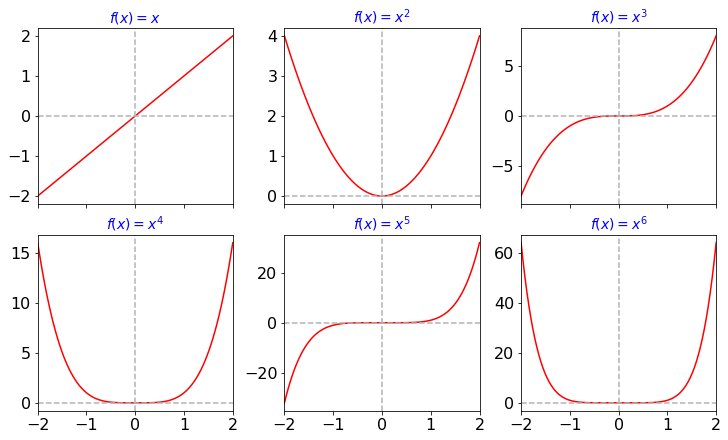

In [16]:
mosaic = [[1,2,3],
         [4,5,6]]
fig, ax = subplot_mosaic(mosaic, constrained_layout=True,figsize=(10,6),sharex=True,sharey=False)

xmin = -2
xmax = 2
npt = 100
# génération de n points équirépartis entre xmin et xmax
x = np.linspace(xmin, xmax, npt)

ax[1].set_xlim(xmin,xmax)
ax[1].plot(x, x,color='red')
ax[1].set_title("$f(x)=x$", fontsize=14, color="blue")
ax[1].axvline(x = 0, color = '0.7',linestyle='--')
ax[1].axhline(y = 0, color = '0.7',linestyle='--')

ax[2].plot(x, x**2,color='red')
ax[2].set_title("$f(x)=x^2$", fontsize=14, color="blue")
ax[2].axvline(x = 0, color = '0.7',linestyle='--')
ax[2].axhline(y = 0, color = '0.7',linestyle='--')

ax[3].plot(x, x**3,color='red')
ax[3].set_title("$f(x)=x^3$", fontsize=14, color="blue")
ax[3].axvline(x = 0, color = '0.7',linestyle='--')
ax[3].axhline(y = 0, color = '0.7',linestyle='--')

ax[4].plot(x, x**4,color='red')
ax[4].set_title("$f(x)=x^4$", fontsize=14, color="blue")
ax[4].axvline(x = 0, color = '0.7',linestyle='--')
ax[4].axhline(y = 0, color = '0.7',linestyle='--')

ax[5].plot(x, x**5,color='red')
ax[5].set_title("$f(x)=x^5$", fontsize=14, color="blue")
ax[5].axvline(x = 0, color = '0.7',linestyle='--')
ax[5].axhline(y = 0, color = '0.7',linestyle='--')

ax[6].plot(x, x**6,color='red')
ax[6].set_title("$f(x)=x^6$", fontsize=14, color="blue")
ax[6].axvline(x = 0, color = '0.7',linestyle='--')
ax[6].axhline(y = 0, color = '0.7',linestyle='--')

#### 2.2.b. Lecture d'un polynôme & régression

On commence par lire un fichier csv, qui est constitué de 2 colonnes de données (X, puis Y) séparées par une tabulation. On trace ensuite Y en fonction de X

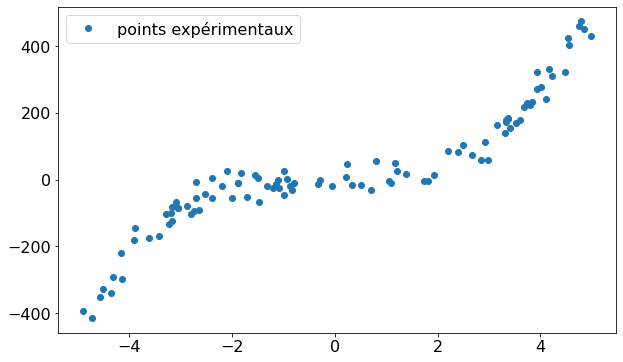

In [33]:
X, Y = np.loadtxt('data/fpol.csv', delimiter='\t', unpack=True) #if unpack is True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...)
plt.rcParams["figure.figsize"] = (10,6) #on ajuste la taille du graphique
plt.plot(X, Y,linestyle='', marker='o', label="points expérimentaux")
legend()

<div class="rq">
La fonction ressemble à un polynôme d'ordre impair.
<li>Essayons d'abord un <i>fit</i> des données par un polynôme d'ordre 3, c'est-à-dire du type $ax^3+bx^2+cx+d$<br>
<li>Puis on va afficher les paramètres du polynôme
<li>Enfin, on va tracer les données et le polynôme sur un même graphe 
</div>

[3.83292575 1.22121719 0.18613754 1.0186907 ]
  3.83x^3 +   1.22x^2 +   0.19x +   1.02


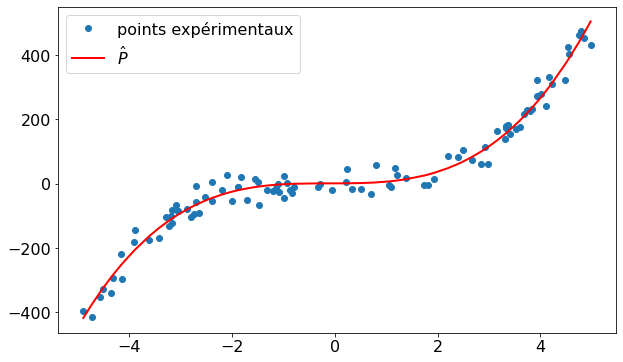

In [34]:
# On appelle la routine polyfit avec les valeurs de X & Y, ainsi que l'ordre du polynôme. Elle va renvoyer les coefficients a, b, c, & d du polynôme, stockés dans la liste PFit
PFit3 = np.polyfit(X, Y, 3)

#affichage des paramètres du polynôme
print(PFit3)
#affichage formaté
print(f"{PFit3[0]:6.2f}x^3 + {PFit3[1]:6.2f}x^2 + {PFit3[2]:6.2f}x + {PFit3[3]:6.2f}")

#inutile de faire des copier/coller des valeurs de a, b, c, d. On va utiliser directement poly1d, en lui passant PFit en paramètre
P_hat  = np.poly1d(PFit3)

# tracé des points
plt.plot(X, Y,linestyle='', marker='o', label="points expérimentaux")
plt.plot(X, P_hat(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()

On constate une très bonne superposition. On va maintenant calculer les erreurs moyennes (MAE et MSE)  

In [35]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print(f"MSE = {MSE(Y,P_hat(X)):8.3f}\nMAE ={MAE(Y,P_hat(X)):8.3f}")

MSE =  835.628
MAE =  23.930


Se pourrait-il qu'un polynôme d'ordre 5 permette un meilleur fit ? On va mettre en &oelig;uvre toute la procédure en finissant par le calcul des erreurs

 -0.00x^5 +  -0.11x^4 +   3.94x^3 +   3.58x^2 +  -0.62x +  -5.75
MSE =  808.090
MAE =  23.167


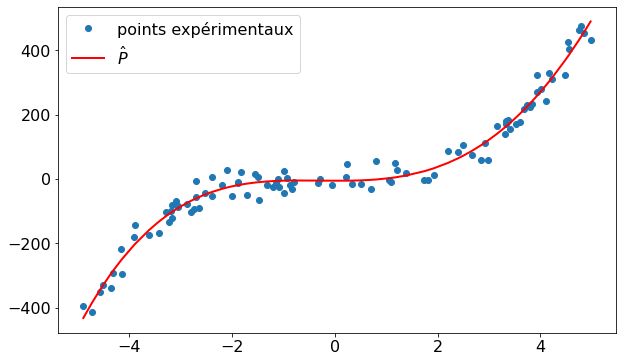

In [36]:
PFit = np.polyfit(X, Y, 5)
print(f"{PFit[0]:6.2f}x^5 + {PFit[1]:6.2f}x^4 + {PFit[2]:6.2f}x^3 + {PFit[3]:6.2f}x^2 + {PFit[4]:6.2f}x + {PFit[5]:6.2f}")
P_hat  = np.poly1d(PFit)
plt.plot(X, Y,linestyle='', marker='o', label="points expérimentaux")
plt.plot(X, P_hat(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()
print(f"MSE = {MSE(Y,P_hat(X)):8.3f}\nMAE ={MAE(Y,P_hat(X)):8.3f}")


<div class="warn">
    Compte tenu des faibles coefficients associés à $x^5$ et $x^4$ il s'agit bien d'une fonction polynomiale d'ordre 3, même si on diminue légèrement l'écart entre fonction prédite et fonction réelle.<br> <br>
    En fait, la fonction tracée a été générée en "bruitant" le polynôme $4x^3+2x^2-3x-6$.<br>
    La comparaison avec les coefficients polynomiaux issues du fit montre qu'il vaut donc mieux chercher à fitter les données avec l'ordre polynomial le plus approprié, même si en apparrence on réduit l'erreur.
</div>

#### 2.2.c. Surapprentissage (ou overfitting)
On va reprendre le même jeu de données, mais on va essayer de réduire l'erreur, en considérant un ordre très élevé

[-2.45654963e-12  9.43000351e-12  4.34798668e-10 -1.59606885e-09
 -3.48617953e-08  1.20764982e-07  1.67584533e-06 -5.38368085e-06
 -5.38711127e-05  1.56832347e-04  1.22264461e-03 -3.12786291e-03
 -2.01540407e-02  4.34568183e-02  2.44299689e-01 -4.18826441e-01
 -2.17776684e+00  2.72221184e+00  1.41083727e+01 -1.11191662e+01
 -6.47335390e+01  2.32743803e+01  2.01225539e+02  6.55521697e-01
 -3.94287873e+02 -1.06886092e+02  4.33701214e+02  1.83380030e+02
 -2.21082377e+02 -9.52775132e+01  4.71119192e+01  4.17718085e+00]
MSE =  519.969
MAE =  17.699


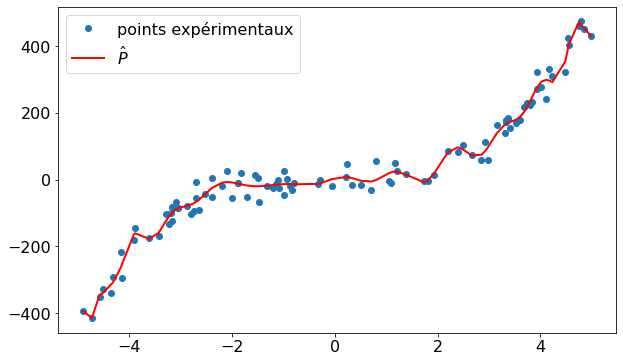

In [51]:
PFit = np.polyfit(X, Y, 31)
print(PFit)
P_hat  = np.poly1d(PFit)
plt.plot(X, Y,linestyle='', marker='o', label="points expérimentaux")
plt.plot(X, P_hat(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()
print(f"MSE = {MSE(Y,P_hat(X)):8.3f}\nMAE ={MAE(Y,P_hat(X)):8.3f}")


<div class="warn">
    L'écart entre points expérimentaux et fonction a beaucoup diminué. L'augmentation de l'ordre permet de passer au plus près d'un grand nombre de points. <br>
    Lorsqu'on examine les valeurs des coefficients on s'aperçoit qu'on s'éloigne beaucoup de la loi réelle qui relie $x$ et ces données ($4x^3+2x^2-3x-6$).<br>
    Dans le contexte de la <b>science des données et de l'apprentissage automatique</b>, on parlerait de <b>surapprentissage</b> (overfitting) : le modèle polynomial sait reproduire beaucoup de détails, mais <b>il est passé à côté du phénomène global</b>, décrit ici par l'équation $4x^3+2x^2-3x-6$.
</div>

### 2.3. Régression avec la librairie SciPy

#### 2.3.a. Appel des librairies

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

#### 2.3.b. Mise en &oelig;uvre du fit

In [23]:
def P3(x,a,b,c,d):
    P =  a*x**3 + b*x**2 + c*x + d
    return P

X, Y = np.loadtxt('data/fpol.csv', delimiter='\t', unpack=True) #if unpack is True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...)

PFit, _ = curve_fit(P3, X, Y)
#affichage des paramètres du polynôme
print(PFit)
#affichage formaté
print(f"{PFit[0]:6.2f}x^3 + {PFit[1]:6.2f}x^2 + {PFit[2]:6.2f}x + {PFit[3]:6.2f}")
print(f"{color.BLUE}à comparer au résultat du fit avec polyfit")
print(f"{PFit3[0]:6.2f}x^3 + {PFit3[1]:6.2f}x^2 + {PFit3[2]:6.2f}x + {PFit3[3]:6.2f}{color.OFF}")

[3.83292571 1.22121706 0.1861381  1.01869173]
  3.83x^3 +   1.22x^2 +   0.19x +   1.02
à comparer au résultat du fit avec polyfit
  3.83x^3 +   1.22x^2 +   0.19x +   1.02


<div class="rq">
    On a utilisé deux librairies différentes (<code>NumPy</code> et <code>SciPy</code>), qui heureusement donnent le même résultat.<br>
    <li> <code>polyfit</code> est plus facile à utiliser pour une régression polynomiale
    <li> <code>curve_fit</code> est beaucoup plus général, puisqu'on peut fitter n'importe quelle fonction mathématique, pas uniquement des polynômes
</div>

### Bilan de la deuxième partie

$\hat{y}=ax+b$

### Suggestion de petite(s) application()s en autonomie

#### Régression linéaire

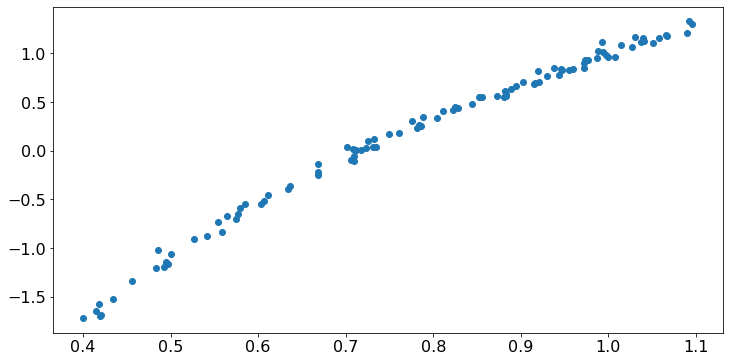

In [25]:
# lecture des data avec la fonction loadtxt de numpy & tracé du nuage de points
from pylab import *
import numpy as np

X, Y = np.loadtxt('data/f2.csv', delimiter='\t', unpack=True)
plt.rcParams["figure.figsize"] = (12,6) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (16) #on ajuste la taille des caractères
plt.plot(X, Y,linestyle='', marker='o')

In [26]:
from scipy.stats import linregress
fit = linregress(x=X, y=Y)

a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR^2 = {r**2:6.3f}")
print(f"Erreur standard sur la valeur de la pente ={stderr:8.3f}\nErreur standard sur la valeur de l'ordonnée à l'origine ={istderr:8.3f}")

a   =    4.175
b   =   -3.110
R^2 =  0.980
Erreur standard sur la valeur de la pente =   0.061
Erreur standard sur la valeur de l'ordonnée à l'origine =   0.049


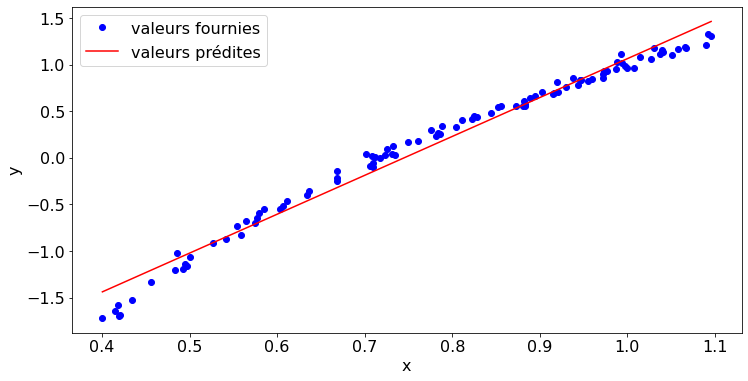

In [27]:
def y_hat(a,b,x):
    return a * x + b
# on calcule Y_hat la longueur prédite, pour chacune des valeurs de X fournies
Y_hat = y_hat(a,b,X)
plot(X, Y,linestyle='', marker='o', color='blue', label='valeurs fournies')
plot(X,Y_hat,color='red', label='valeurs prédites')
xlabel("x") # label de l'axe des abscisses
ylabel("y") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

In [28]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print(f"MSE = {MSE(Y,Y_hat):8.3f}\nMAE ={MAE(Y,Y_hat):8.3f}")

MSE =    0.014
MAE =   0.096


(-0.35, 0.35)

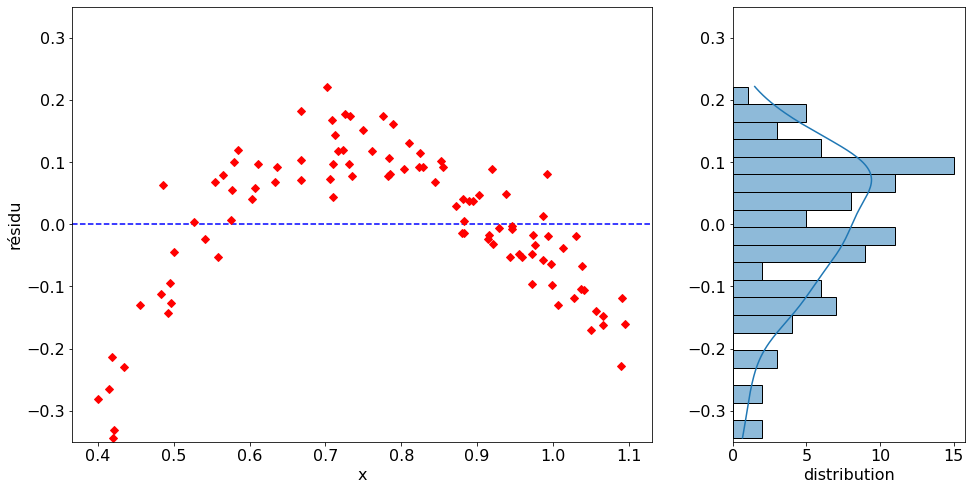

In [29]:
def residus(y,y_hat):
    return y-y_hat

import seaborn as sb
from matplotlib import gridspec
nbins=20
limit=0.35
plt.rcParams["figure.figsize"] = (16,8) #on ajuste la taille du graphique
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 1])
plt.subplot(gs[0])
axhline(y = 0, color = 'b',linestyle='--')
plt.plot(X,residus(Y,Y_hat), linestyle='', marker="D", color='red')
xlabel("x")
ylabel("résidu")
plt.ylim(-limit,limit)
plt.subplot(gs[1])
xlabel("x")
xlabel("distribution")
sb.histplot(y=residus(Y,Y_hat),bins=nbins,kde=True)
plt.ylim(-limit,limit)

#### Régression logarithmique

[3.01280799 1.0035966 ]
  3.01ln(x) +   1.00
MSE =    0.002
MAE =   0.036


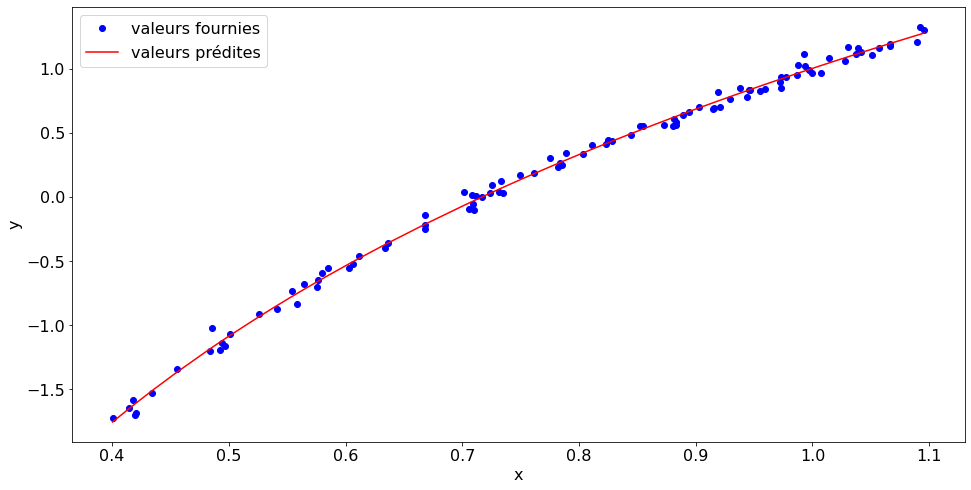

(-0.2, 0.2)

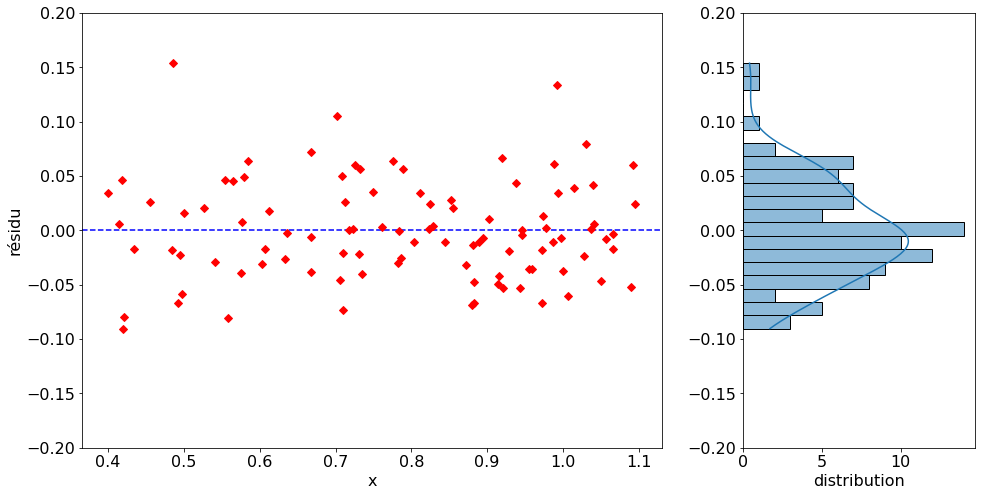

In [30]:
from numpy import log as ln
def fln(x,a,b):
    return a*ln(x)+b

X, Y = np.loadtxt('data/f2.csv', delimiter='\t', unpack=True)
PFit, _ = curve_fit(fln, X, Y)
#affichage des paramètres du polynôme
print(PFit)
#affichage formaté
print(f"{PFit[0]:6.2f}ln(x) + {PFit[1]:6.2f}")

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
a=PFit[0]
b=PFit[1]
Y_hat=fln(X,a,b)
print(f"MSE = {MSE(Y,Y_hat):8.3f}\nMAE ={MAE(Y,Y_hat):8.3f}")

plot(X, Y,linestyle='', marker='o', color='blue', label='valeurs fournies')
plot(X,Y_hat,color='red', label='valeurs prédites')
xlabel("x") # label de l'axe des abscisses
ylabel("y") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe
show()

def residus(y,y_hat):
    return y-y_hat

import seaborn as sb
from matplotlib import gridspec
nbins=20
limit=0.2
plt.rcParams["figure.figsize"] = (16,8) #on ajuste la taille du graphique
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 1])
plt.subplot(gs[0])
axhline(y = 0, color = 'b',linestyle='--')
plt.plot(X,residus(Y,Y_hat), linestyle='', marker="D", color='red')
xlabel("x")
ylabel("résidu")
plt.ylim(-limit,limit)
plt.subplot(gs[1])
xlabel("x")
xlabel("distribution")
sb.histplot(y=residus(Y,Y_hat),bins=nbins,kde=True)
plt.ylim(-limit,limit)

In [31]:
# Démarrage du thème 3
import visualID as vID
from visualID import color
vID.init()

**Début à:** Tuesday 24 May 2022, 18:35:35  
**Hostname:** insa-11357 (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoBegin.svg" style="margin-left:auto; margin-right:auto"></img></p>

## 3. Apprentissage supervisé (*supervised Machine Learning*) appliqué à la classification<br>(régression logistique)

<div class="warn">
    <b style='color:red'>Ce thème n'est pas si complexe, mais l'analyse du code est réservée aux plus curieux et motivés.</b>
    <br>Il a pour objectif de montrer qu'il est possible de prédire une valeur sur la base d'une corrélation multifactorielle entre une <b>classe d'objets</b> (ici des espèces d'iris) et des <b>propriétés</b> (ou descripteurs, ici les largeurs et longueurs des pétales et des sépales) 
    <br><b style='color:red'>Les moins curieux doivent <i>a minima</i> lire les commentaires et exécuter ce code pour en comprendre le principe.</b>
   </div>

### 3.1. Introduction

#### 3.1.a. Principe général

#### 3.1.b. Importation des librairies utiles

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

ModuleNotFoundError: No module named 'tensorflow'

### 3.2. Préparation des données

#### 3.2.a. Séparation des données en deux sous-ensembles d'apprentissage et de test

In [4]:
dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)
data_train = dfi.sample(frac=0.8, axis='index')
data_test  = dfi.drop(data_train.index)
x_train = data_train.drop(['species'],axis=1)
y_train = data_train['species']
x_test  = data_test.drop(['species'],axis=1)
y_test  = data_test['species']
print('x_train : ',x_train.shape)
display(x_train)
print('y_train : ',y_train.shape)
display(y_train)

Dfi. Structure (shape) :(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


x_train :  (120, 4)


,sepal_length,sepal_width,petal_length,petal_width
101,5.8,2.7,5.1,1.9
26,5.0,3.4,1.6,0.4
87,6.3,2.3,4.4,1.3
98,5.1,2.5,3.0,1.1
62,6.0,2.2,4.0,1.0
...,...,...,...,...
96,5.7,2.9,4.2,1.3
84,5.4,3.0,4.5,1.5
75,6.6,3.0,4.4,1.4
81,5.5,2.4,3.7,1.0


y_train :  (120,)


101     virginica
26         setosa
87     versicolor
98     versicolor
62     versicolor
          ...    
96     versicolor
84     versicolor
75     versicolor
81     versicolor
60     versicolor
Name: species, Length: 120, dtype: object

#### 3.2.b. Adaptation des données à la régression logistique par le réseau de neurones

In [5]:
# one-hot-encoding des espèces de y_train & y_test. 
# on utilise une fonction maison, qui elle-même appelle la fonction to_categorical de keras
# cette fonction, categorizeY_2ohe, est définie dans le package visualID importé au début ce ce notebook
y_train_ohe, y_test_ohe = vID.categorizeY_2ohe(dfi["species"], y_train, y_test)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train.values)
x_trainS = scaler.transform(x_train.values) #returns a numpy array
x_testS = scaler.transform(x_test.values) #returns a numpy array
x_trainD = pd.DataFrame(x_trainS, columns=x_train.columns, index=x_train.index)
x_testD = pd.DataFrame(x_testS, columns=x_test.columns, index=x_test.index)
display(x_trainD.describe().style.format("{0:.2f}").set_caption("Training set après normalisation (avec scikit-learn):"))
display(x_testD.describe().style.format("{0:.2f}").set_caption("Test set after après normalisation (avec scikit-learn):"))
x_train = x_trainS
x_test = x_testS
del x_trainD, x_testD, x_trainS, x_testS

Catégories uniques : ['setosa' 'versicolor' 'virginica']
Correspondance entre chaque catégorie unique et un entier : {'setosa': 0, 'versicolor': 1, 'virginica': 2}


ModuleNotFoundError: No module named 'tensorflow'

### 3.3. Modèle de réseau de neurones (ANN = artificial neural network)

#### 3.3.a. Définition du modèle

In [228]:
def get_model(shape):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name='iLayer'))
    model.add(keras.layers.Dense(7, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dense(5, activation='relu', name='hLayer2'))
    model.add(keras.layers.Dense(3, activation='softmax', name='oLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

#### 3.3.b. Apprentissage supervisé du réseau de neurones

In [229]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
print(f"x_train. Structure (shape) : {x_train.shape}")
print(f"x_test. Structure (shape) : {x_test.shape}")
print(f"y_train_ohe. Structure (shape) : {y_train_ohe.shape}")
print(f"y_test_ohe. Structure (shape) : {y_test_ohe.shape}")
ANNmodel=get_model( (4,))
ANNmodel.summary()
vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train_ohe,
                    epochs          = 700,
                    batch_size      = 5,
                    verbose         = 1,
                    validation_data = (x_test, y_test_ohe),
                    callbacks=[es])
vID.chrono_show()

x_train. Structure (shape) : (120, 4)
x_test. Structure (shape) : (30, 4)
y_train_ohe. Structure (shape) : (120, 3)
y_test_ohe. Structure (shape) : (30, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hLayer1 (Dense)              (None, 7)                 35        
_________________________________________________________________
hLayer2 (Dense)              (None, 5)                 40        
_________________________________________________________________
oLayer (Dense)               (None, 3)                 18        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
Epoch 1/700


2022-05-24 18:19:08.220060: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-24 18:19:08.220407: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-24 18:19:08.221402: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
2022-05-24 18:19:08.341234: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-24 18:19:08.342122: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2099940000 Hz


24/24 [==============================] - 1s 32ms/step - loss: 0.9737 - accuracy: 0.7376 - val_loss: 0.9181 - val_accuracy: 0.7000
Epoch 2/700
24/24 [==============================] - 0s 5ms/step - loss: 0.9333 - accuracy: 0.7782 - val_loss: 0.8661 - val_accuracy: 0.7000
Epoch 3/700
24/24 [==============================] - 0s 6ms/step - loss: 0.9018 - accuracy: 0.7499 - val_loss: 0.8139 - val_accuracy: 0.8000
Epoch 4/700
24/24 [==============================] - 0s 5ms/step - loss: 0.8183 - accuracy: 0.7954 - val_loss: 0.7601 - val_accuracy: 0.8000
Epoch 5/700
24/24 [==============================] - 0s 6ms/step - loss: 0.8013 - accuracy: 0.8074 - val_loss: 0.7110 - val_accuracy: 0.8333
Epoch 6/700
24/24 [==============================] - 0s 7ms/step - loss: 0.7469 - accuracy: 0.8068 - val_loss: 0.6636 - val_accuracy: 0.8333
Epoch 7/700
24/24 [==============================] - 0s 8ms/step - loss: 0.6869 - accuracy: 0.8632 - val_loss: 0.6174 - val_accuracy: 0.8333
Epoch 8/700
24/24 [=====

### 3.4. Évaluation de la précision du réseau de neurones après apprentissage

#### 3.4.a. Évaluation numérique globale

In [230]:
evalANN_on_Train = ANNmodel.evaluate(x_train, y_train_ohe, verbose=0)
print(f"{color.GREEN}x_train / loss      : {evalANN_on_Train[0]:5.4f}{color.OFF}")
print(f"{color.GREEN}x_train/ accurracy  : {evalANN_on_Train[1]:5.4f}{color.OFF}")
print()
evalANN_on_Test = ANNmodel.evaluate(x_test, y_test_ohe, verbose=0)
print(f"{color.BLUE}x_train / loss      : {evalANN_on_Test[0]:5.4f}{color.OFF}")
print(f"{color.BLUE}x_train/ accurracy  : {evalANN_on_Test[1]:5.4f}{color.OFF}")

x_train / loss      : 0.0476
x_train/ accurracy  : 0.9833

x_train / loss      : 0.0557
x_train/ accurracy  : 1.0000


#### 3.4.b. Comportement du modèle vis-à-vis de chaque espèce d'iris

In [231]:
usp = dfi['species'].unique()
print(f"{color.BOLD}{color.GREEN}Catégories uniques d'iris :{color.OFF} {usp}")
# cette correspondance élément 0 <-> setosa ; élément 1 <-> versicolor ; élément 2 <-> virginica
# va servir à transformer les probabilités les plus élevées en espèce d'iris

y_train_hat=ANNmodel.predict(x_train)
ytr_hD = pd.DataFrame(y_train_hat, columns=usp, index=y_train.index)
# argmax renvoie l'indice de la valeur maximale selon un axe (0 = ligne / 1 = colonne)
# ça va ici nous renvoyer pour chaque ligne le numéro de la colonne qui contient la plus grande valeur de probabilité
# on convertit maintenant 0, 1 & 2 en espèce d'iris
iris_tr_hat = usp[np.argmax(y_train_hat,axis=1)]
# on ajoute cette colonne au dataframe ythd
ytr_hD['Espèce prédite'] = pd.DataFrame(iris_tr_hat, index=y_train.index)
ytr_hD['Espèce observée'] = pd.DataFrame(y_train, index=y_train.index)
print(f"{color.BOLD}{color.BLUE}Test Set{color.OFF}. Comparaison entre espèce prédite et espèce observée")
pd.set_option('display.max_rows', None) #on veut afficher toutes les lignes des DataFrames
pd.options.display.float_format = '{:,.2f}'.format #on formatte les probabilités, sinon c'est illisible
display(ytr_hD)
pd.set_option('display.max_rows', 10) #reset de l'affichage: 5 premières et 5 dernières lignes
pd.options.display.float_format = None #reset de l'affichage: format standard 
diff_Pred_Obs=np.where(ytr_hD['Espèce prédite'] == ytr_hD['Espèce observée'], 0, 1)
print(f"Nombre d'erreurs : {np.sum(diff_Pred_Obs)}")

print()
y_test_hat=ANNmodel.predict(x_test)
ytt_hD = pd.DataFrame(y_test_hat, columns=usp, index=y_test.index)
# argmax renvoie l'indice de la valeur maximale selon un axe (0 = ligne / 1 = colonne)
# ça va ici nous renvoyer pour chaque ligne le numéro de la colonne qui contient la plus grande valeur de probabilité
# on convertit maintenant 0, 1 & 2 en espèce d'iris
iris_tt_hat = usp[np.argmax(y_test_hat,axis=1)]
# on ajoute cette colonne au dataframe ythd
ytt_hD['Espèce prédite'] = pd.DataFrame(iris_tt_hat, index=y_test.index)
ytt_hD['Espèce observée'] = pd.DataFrame(y_test, index=y_test.index)
print(f"{color.BOLD}{color.RED}Test Set{color.OFF}. Comparaison entre espèce prédite et espèce observée.")
pd.set_option('display.max_rows', None) #on veut afficher toutes les lignes des DataFrames
pd.options.display.float_format = '{:,.2f}'.format #on formatte les probabilités, sinon c'est illisible
display(ytt_hD)
pd.set_option('display.max_rows', 10) #reset de l'affichage: 5 premières et 5 dernières lignes
pd.options.display.float_format = None #reset de l'affichage: 
diff_Pred_Obs=np.where(ytr_hD['Espèce prédite'] == ytr_hD['Espèce observée'], 0, 1)
print(f"Nombre d'erreurs : {np.sum(diff_Pred_Obs)}")

Catégories uniques d'iris : ['setosa' 'versicolor' 'virginica']
Test Set. Comparaison entre espèce prédite et espèce observée


,setosa,versicolor,virginica,Espèce prédite,Espèce observée
105,0.00,0.00,1.00,virginica,virginica
92,0.00,1.00,0.00,versicolor,versicolor
33,1.00,0.00,0.00,setosa,setosa
11,1.00,0.00,0.00,setosa,setosa
40,1.00,0.00,0.00,setosa,setosa
89,0.00,1.00,0.00,versicolor,versicolor
108,0.00,0.00,1.00,virginica,virginica
134,0.00,0.09,0.91,virginica,virginica
110,0.00,0.08,0.92,virginica,virginica
141,0.00,0.01,0.99,virginica,virginica


Nombre d'erreurs : 2

Test Set. Comparaison entre espèce prédite et espèce observée.


,setosa,versicolor,virginica,Espèce prédite,Espèce observée
2,1.00,0.00,0.00,setosa,setosa
3,1.00,0.00,0.00,setosa,setosa
8,1.00,0.00,0.00,setosa,setosa
10,1.00,0.00,0.00,setosa,setosa
14,1.00,0.00,0.00,setosa,setosa
24,1.00,0.00,0.00,setosa,setosa
28,1.00,0.00,0.00,setosa,setosa
34,1.00,0.00,0.00,setosa,setosa
35,1.00,0.00,0.00,setosa,setosa
41,0.70,0.30,0.00,setosa,setosa


Nombre d'erreurs : 2


### Bilan de la troisième partie

In [232]:
vID.end()

**Fin à:** Tuesday 24 May 2022, 18:20:16  
**Durée:** 00:12:31 571ms

<p style="text-align: center"><img width="800px" src="./svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"></img></p>

## Annexes & fonds de tiroirs

### A. Pandas et corrélation de données

**La première partie a pour but de créer des données au format pandas. Certaines sont corrélées entre elles. On va vérifier que la carte thermique est cohérente avec les corrélations**


Création des données. Vous n'avez aucune intervention à faire dans cette cellule, à part l'exécuter

In [236]:
import numpy as np 
import seaborn as sb
from pylab import *
import random

def noiseF(f, X):
    noise = 2
    N = noise * np.random.normal(0,1,(nbp,1))
#    print(N)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f0(x):
    return 50
def f1(x):
    return 3*x
def f2(x):
    return -5*x
def f3(x):
    return x**2
def f4(x):
    return sin(x)*50
def f5(x):
    return cos(x)*50

nbp = 100
xmin = -10
xmax = 10. 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,(nbp,1))
#print(X)
data0 = noiseF(f0,X)
data1 = noiseF(f1,X)
data2 = noiseF(f2,X)
data3 = noiseF(f3,X)
data4 = noiseF(f4,X)
data5 = noiseF(f5,X)

On va tracer les 4 fonctions pour voir à quoi elles ressemblent.  Vérifier de visu que les distributions de points sont cohérentes avec les expressions des fonctions

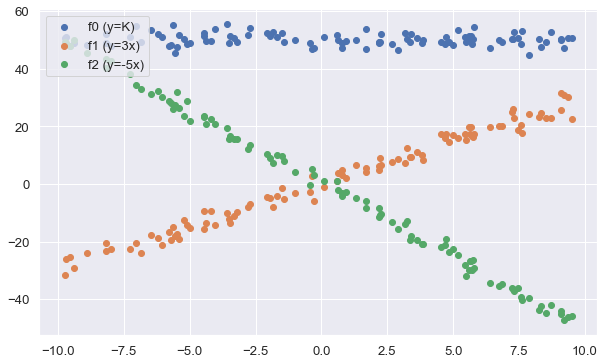

In [237]:
scatter(data0[:,0],data0[:,1],label='f0 (y=K)')
scatter(data1[:,0],data1[:,1],label='f1 (y=3x)')
scatter(data2[:,0],data2[:,1],label='f2 (y=-5x)')
legend(loc="upper left")

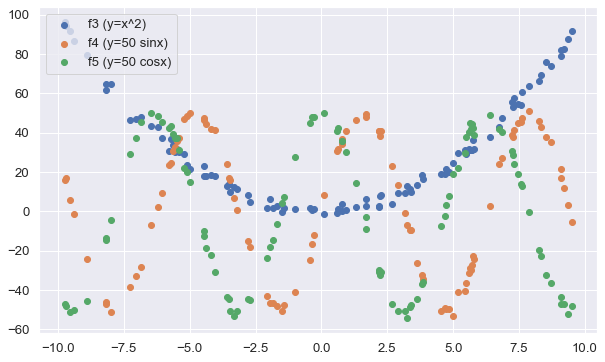

In [238]:
scatter(data3[:,0],data3[:,1],label='f3 (y=x^2)')
scatter(data4[:,0],data4[:,1],label='f4 (y=50 sinx)')
scatter(data5[:,0],data5[:,1],label='f5 (y=50 cosx)')
legend(loc="upper left")

On va maintenant stocker ces données au format pandas. La 1ère colonne du tableau `df` va contenir les valeurs de x, et les suivantes les valeurs que prennent les fonctions f0, f1, ... pour chacune des valeurs de x

In [239]:
import pandas as pd
df = pd.DataFrame(data0, columns = ['x','f0 (y=K)'])
df['f1 (y=3x)'] = pd.DataFrame(data1[:,1])
df['f2 (y=-5x)'] = pd.DataFrame(data2[:,1])
df['f3 (y=x^2)'] = pd.DataFrame(data3[:,1])
df['f4 (y=50 sinx)'] = pd.DataFrame(data4[:,1])
df['f5 (y=50 cosx)'] = pd.DataFrame(data5[:,1])

<div class="warn">Maintenant, à vous de jouer</div> 
(1) afficher le tableau `df`, qui contient les données

In [240]:
display(df)

,x,f0 (y=K),f1 (y=3x),f2 (y=-5x),f3 (y=x^2),f4 (y=50 sinx),f5 (y=50 cosx)
0,-9.384988,49.024390,-29.238089,49.808476,86.745186,-1.467014,-50.181122
1,9.207388,47.112340,30.937275,-47.369797,82.724917,11.823107,-47.185391
2,-6.481967,53.393397,-17.626392,31.326304,43.529769,-6.809201,49.893409
3,5.776132,54.440931,17.161030,-29.266344,31.447081,-24.437563,38.728469
4,7.259388,50.270361,26.067938,-36.593222,53.137888,37.565168,28.866246
...,...,...,...,...,...,...,...
95,8.522789,49.305776,22.808271,-44.620445,75.673371,37.607753,-32.231682
96,-0.347268,46.918710,2.652725,5.206227,0.616220,-16.568148,47.927964
97,6.750696,50.097187,20.242770,-35.263681,42.863607,23.860027,42.065406
98,7.554985,48.490736,20.511451,-39.104966,54.004042,45.163764,13.854056


(2) Afficher un aperçu de la distribution statistique des données

(3) Tracer toutes ces données les unes en fonctions des autres (*suggestion*: utiliser la fonction `pairplot`)

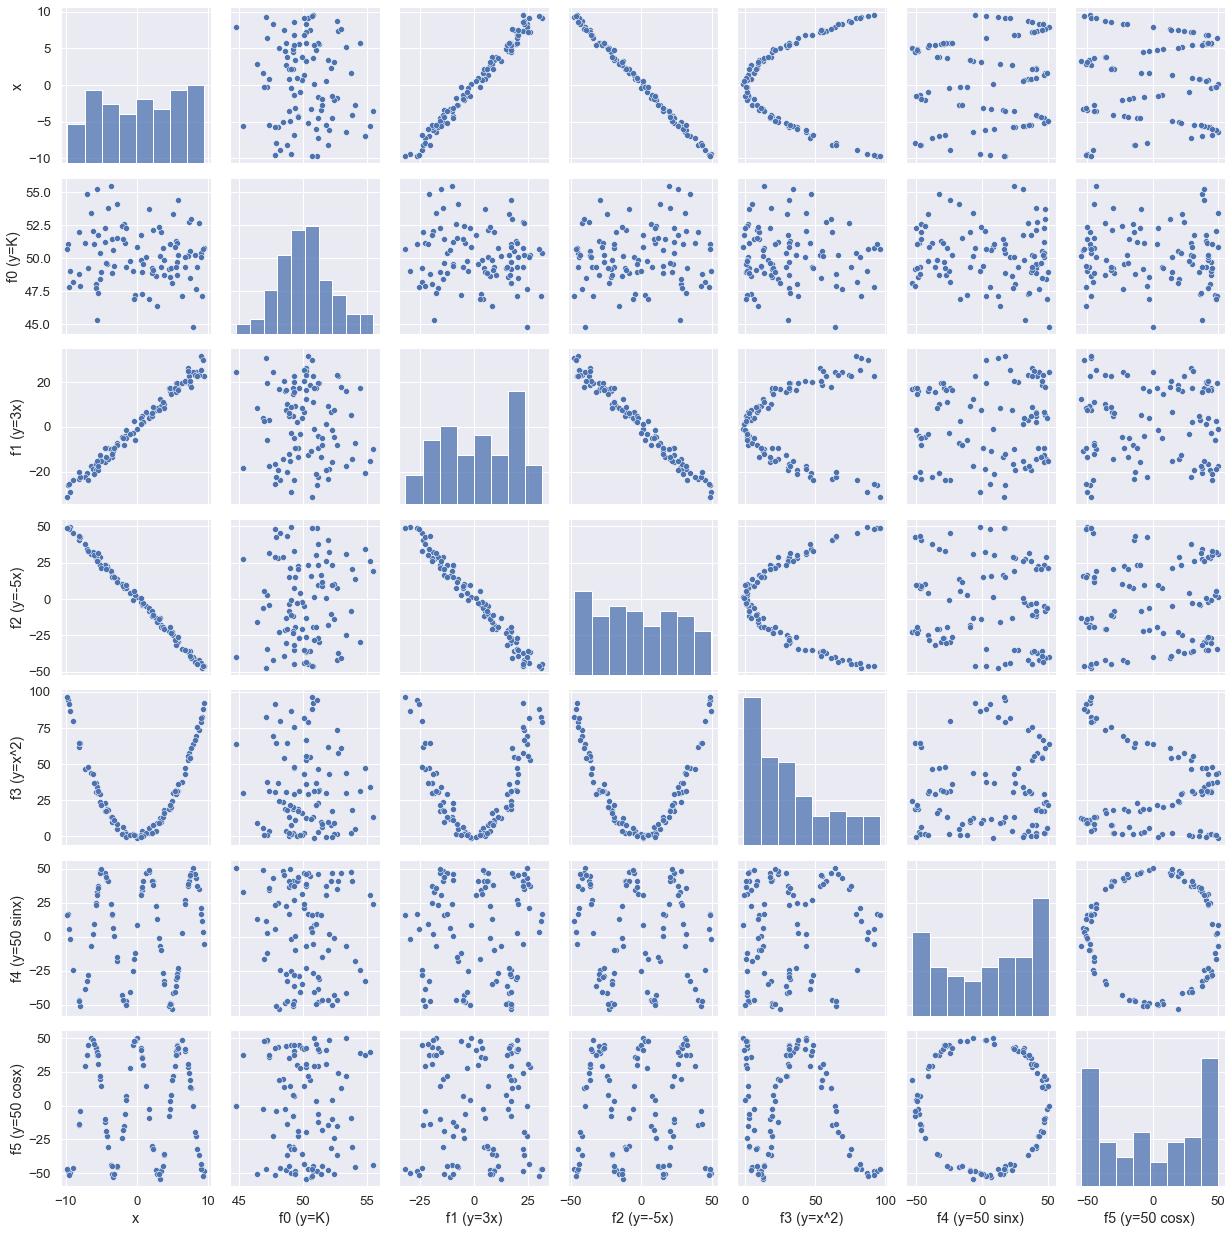

In [241]:
sb.pairplot(df)

(4) Tracer une carte thermique (*suggestion*: utiliser la fonction `heatmap`)

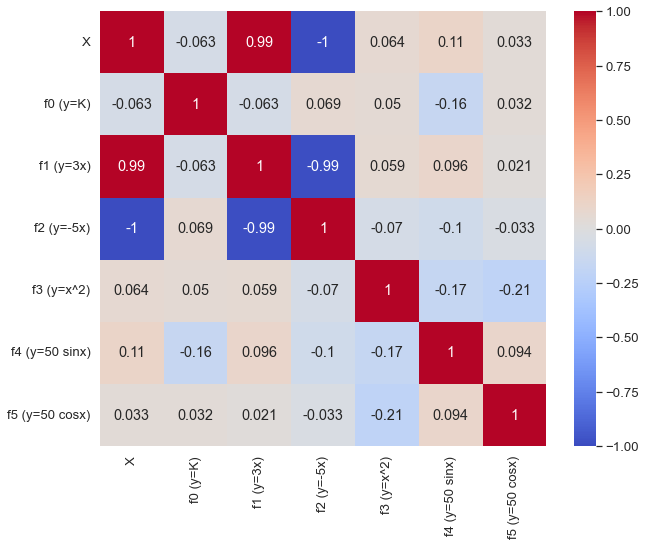

In [51]:
plt.figure(figsize = (10,8))
sb.set(font_scale=1.2)
_ = sb.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')

### B. régression linéaire avec scikit learn

In [197]:
dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
display(dfi)

from sklearn.linear_model import LinearRegression
pw = dfi["petal_width"].values.reshape(-1,1)
#print(pw.shape)
#print(pw)
pl = dfi["petal_length"].values
#print(pl.shape)
#print(pl)
# création de l'objet "régression linéaire"
fitlin = LinearRegression()

# recherche des paramètres du modèle linéaire
fitlin.fit(pw, pl)
pl_hat=fitlin.predict(pw)
a = fitlin.coef_
b = fitlin.intercept_
from sklearn.metrics import r2_score
r2 = r2_score(pl, pl_hat)
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a[0], b, r2))
from sklearn.metrics import mean_squared_error as MSE
print()
from sklearn.metrics import mean_absolute_error as MAE
print("MSE ={:8.3f}\nMAE ={:8.3f}".format(MSE(pl,pl_hat), MAE(pl,pl_hat)))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


a   =   2.226
b   =   1.091
r^2 = 0.92690

MSE =   0.226
MAE =   0.368


### X. Divers pour l'élaboration du sujet (arrière-cuisine)

#### X.1. Tracé d'une fonction linéaire bruitée

,x,y
0,-2.665858,3.055314
1,-9.167184,-17.009383
2,4.531059,25.558470
3,-7.635862,-7.345300
4,-5.641250,-3.997566
...,...,...
95,-3.625694,-4.648045
96,-9.085717,-10.065830
97,-8.153105,-13.720890
98,-4.910913,-1.944133


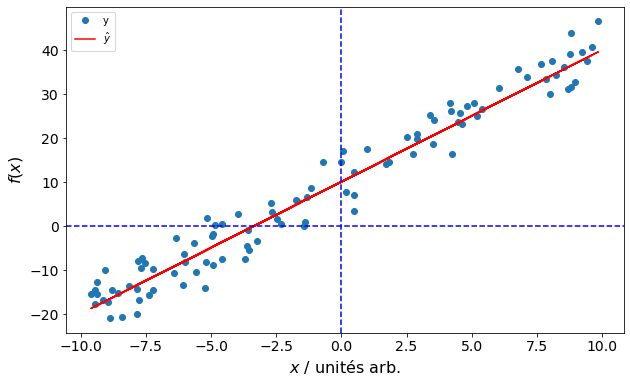

In [1]:
import numpy as np 
import seaborn as sb
import pandas as pd
import random
import matplotlib.pyplot as plt

def noiseF(f, X, noise):
    N = noise * np.random.normal(0,1,(nbp,1))
#    print(N)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f1(x):
    return 3*x+10

nbp = 100
xmin = -10
xmax = 10. 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,(nbp,1))
noisef1 = noiseF(f1,X,4)
f1tab = f1(X)
df1 = pd.DataFrame(noisef1, columns=['x','y'])
display(df1)
plt.rcParams["figure.figsize"] = (10,6)
axf1=df1.plot(x="x", y=["y"],fontsize=14, linestyle='', marker='o')
axf1.plot(X,f1tab,color='r',label='$\hat{y}$')
axf1.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axf1.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axf1.legend()
axf1.axvline(x = 0, color = 'b',linestyle='--')
axf1.axhline(y = 0, color = 'b',linestyle='--')
pngf1='./svg/fct1.png'
plt.savefig(pngf1,dpi=300,bbox_inches='tight',transparent=False)

#### X.2. Tracé d'une fonction quasi-linéaire bruitée

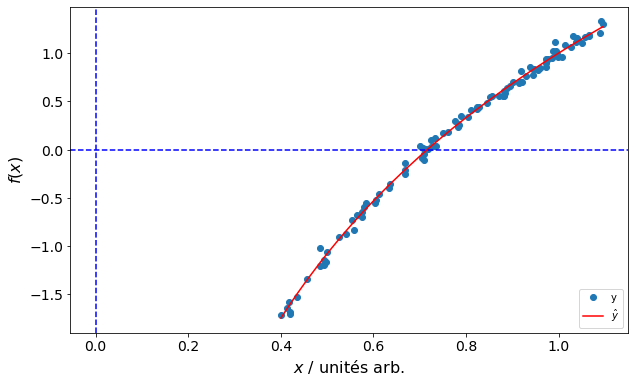

In [2]:
#exécuter d'abord le X.1
from numpy import log as ln
def f2(x):
    return 3*ln(x)+1

nbp = 100
xmin = 0.4
xmax = 1.1 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,(nbp,1))
index=np.argsort(X[:,0], axis=0)
noisef2 = noiseF(f2,X,0.04)
X=X[index]
noisef2=noisef2[index,:]
f2tab = f2(X)
df2 = pd.DataFrame(noisef2, columns=['x','y'])
plt.rcParams["figure.figsize"] = (10,6)
axf2=df2.plot(x="x", y=["y"],fontsize=14, linestyle='', marker='o')
axf2.plot(X,f2tab,color='r',label='$\hat{y}$')
axf2.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axf2.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axf2.legend()
axf2.axvline(x = 0, color = 'b',linestyle='--')
axf2.axhline(y = 0, color = 'b',linestyle='--')

np.savetxt('data/f2.csv', noisef2, delimiter="\t")

#### X.3. Tracé d'une fonction polynomiale bruitée

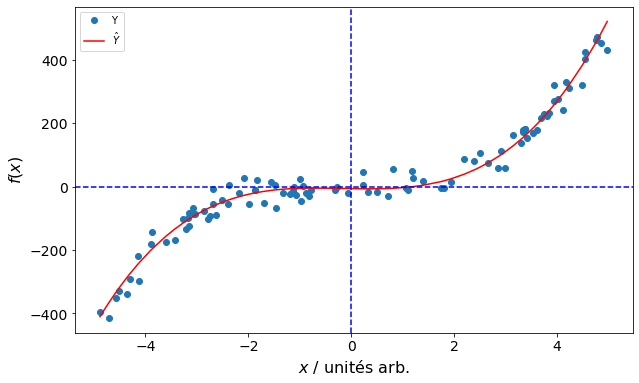

In [3]:
#exécuter d'abord le X.1
def fpol(x):
    return 4*x**3+2*x**2-3*x-6

nbp = 100
xmin = -5
xmax = 5 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,(nbp,1))
index=np.argsort(X[:,0], axis=0)
X=X[index]
noisefpol = noiseF(fpol,X,30)
fpoltab = fpol(X)

dfpol = pd.DataFrame(noisefpol, columns=['X','Y'])
plt.rcParams["figure.figsize"] = (10,6)
axfpol=dfpol.plot(x="X", y=["Y"],fontsize=14, linestyle='', marker='o')
axfpol.plot(X,fpoltab,color='r',label='$\hat{Y}$')
axfpol.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axfpol.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axfpol.legend()
axfpol.axvline(x = 0, color = 'b',linestyle='--')
axfpol.axhline(y = 0, color = 'b',linestyle='--')
np.savetxt('data/fpol.csv', noisefpol, delimiter="\t")

##### 